In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.optimizers import *
from keras.models import load_model
import matplotlib.pyplot as plt
from music21 import chord, instrument, converter, note, stream
import glob
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization as BatchNorm
import time
import random

print("DONE")

DONE


In [1]:
# colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


notes = []
start_time = time.time()
for file in glob.glob("drive/MyDrive/Praca_inzynierska/dane_treningowe/midi_clear/*.mid"):
    midi = converter.parse(file)
    parts = instrument.partitionByInstrument(midi)
    notes_to_parse = None

    if parts:
        for part in parts:
            if part.getInstrument() is not None:
                instrument_name = part.getInstrument().instrumentName
                if instrument_name == "Acoustic Guitar":
                    notes_to_parse = part.recurse()
                    chord_notes = []
                    for element in notes_to_parse:
                        if isinstance(element, note.Note):
                            notes.append(str(element.pitch))
                        elif isinstance(element, chord.Chord):
                            notes.append('.'.join(str(n) for n in element.normalOrder))
                            #chord_notes = [str(n) for n in element.normalOrder]
                            #chord_str = '.'.join(chord_notes)
                            #notes.append(chord_str)

with open("midi_test_mala.txt", "w") as file:
    for note_item in notes:
        file.write(note_item + " ")
end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time_minutes = elapsed_time / 60
print(f"Czas wykonywania programu: {elapsed_time_minutes} minut")
print("DONE")


In [143]:
notes = []
data1 = []
with open('drive/MyDrive/Praca_inzynierska/mala_baza.txt', 'r') as file:
    data = file.read().split()

for item in data:
    data1.append(item)

lm = int(0.05 * len(data1))

for item in range(lm):
    notes.append(data1[item])



print("DONE")

DONE


In [4]:
print(notes[:100])

['D2', '2.5.9', 'D2', '2.5.9', 'D2', '2.5.9', '2.5.9', 'D2', '2.5.9', '2.5.9', 'B-1', '10.2.5', 'B-1', '10.2.5', 'B-1', '10.2.5', '10.2.5', 'B-1', '10.2.5', '10.2.5', 'F2', '5.9.0', 'F2', '5.9.0', '5.9.0', 'C2', '0.4.7', 'C2', '0.4.7', '0.4.7', 'F2', '5.9.0', 'F2', '5.9.0', 'F2', '5.9.0', '5.9.0', '5.9.0', 'F2', '5.9.0', '5.9.0', '5.9.0', 'F2', '5.9.0', 'F2', '5.9.0', '5.9.0', 'C2', '0.4.7', 'C2', '0.4.7', '0.4.7', 'F2', '5.9.0', 'F2', '5.9.0', 'F2', '5.9.0', '5.9.0', '5.9.0', 'F2', '5.9.0', '5.9.0', '5.9.0', 'B-1', '10.2.5', 'B-1', '10.2.5', 'B-1', '10.2.5', '10.2.5', '10.2.5', 'B-1', '10.2.5', '10.2.5', '10.2.5', 'F2', '5.9.0', 'F2', '5.9.0', 'F2', '5.9.0', '5.9.0', '5.9.0', 'F2', '5.9.0', '5.9.0', '5.9.0', 'F2', '5.9.0', 'F2', '5.9.0', '5.9.0', 'C2', '0.4.7', 'C2', '0.4.7', '0.4.7', 'F2', '5.9.0']


In [144]:
pitchnames = sorted(set(item for item in notes)) # zbiór unikalnych akordów i nut
n_vocab = len(pitchnames) #ilosc unikalnych nut i akordów
#słownik, przypisanie nutom ich odpowiednich liczb
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
print("DONE")
print(n_vocab)
print(note_to_int)

DONE
334
{'0': 0, '0.1': 1, '0.1.2': 2, '0.1.2.3': 3, '0.1.3.4': 4, '0.1.3.4.6': 5, '0.1.3.4.8': 6, '0.1.3.6': 7, '0.1.4': 8, '0.1.5': 9, '0.2': 10, '0.2.3': 11, '0.2.3.5': 12, '0.2.4.7': 13, '0.2.5.7': 14, '0.2.6': 15, '0.2.7': 16, '0.3': 17, '0.3.5': 18, '0.3.6': 19, '0.3.6.9': 20, '0.3.7': 21, '0.4': 22, '0.4.7': 23, '0.5': 24, '0.6': 25, '1': 26, '1.2': 27, '1.2.5': 28, '1.3': 29, '1.3.4': 30, '1.3.4.8': 31, '1.3.6': 32, '1.3.6.8': 33, '1.3.7': 34, '1.3.8': 35, '1.4': 36, '1.4.6': 37, '1.4.6.9': 38, '1.4.7': 39, '1.4.7.9': 40, '1.4.8': 41, '1.5': 42, '1.5.9': 43, '1.6': 44, '1.7': 45, '10': 46, '10.0': 47, '10.0.2': 48, '10.0.2.5': 49, '10.0.3': 50, '10.0.4': 51, '10.0.5': 52, '10.1': 53, '10.1.3': 54, '10.1.3.6': 55, '10.1.4': 56, '10.1.4.6': 57, '10.1.5': 58, '10.11': 59, '10.11.0': 60, '10.11.1.2': 61, '10.11.1.3.6': 62, '10.11.3': 63, '10.11.3.6': 64, '10.2': 65, '10.2.3': 66, '10.2.5': 67, '10.3': 68, '11': 69, '11.0': 70, '11.0.1': 71, '11.0.1.2.3': 72, '11.0.1.2.3.7': 73, '1

In [145]:
#wejscia i wyjścia sieci
network_input = []
network_output = []
network = []
seq = 65 # dlugosc sekwencji wejsciowej 10,25,50,100
sequence_length = seq + 1

for i in range(0, len(notes) - sequence_length):
    sequence = notes[i:i + sequence_length]
    network.append(sequence)

random.shuffle(network)

for j in range(len(network)):
    sequence_in = network[j][:(sequence_length - 1)]
    sequence_out = network[j][sequence_length - 1]
    network_input.append([note_to_int[char] for char in sequence_in])
    network_output.append(note_to_int[sequence_out])

n_patterns = len(network_input)
print(network_input[10:100])
print(network_output[0])

print("DONE")

[[164, 112, 276, 112, 317, 114, 112, 276, 112, 114, 112, 273, 112, 114, 112, 317, 114, 112, 112, 112, 213, 213, 114, 112, 273, 106, 282, 106, 322, 67, 106, 282, 106, 67, 106, 65, 106, 36, 276, 36, 312, 263, 36, 276, 36, 263, 36, 262, 36, 106, 276, 106, 322, 111, 106, 276, 106, 111, 106, 273, 106, 87, 106, 331, 83], [220, 276, 332, 313, 23, 331, 277, 323, 23, 296, 331, 277, 323, 220, 23, 220, 312, 332, 313, 23, 331, 23, 276, 220, 331, 323, 302, 220, 276, 313, 297, 23, 331, 323, 302, 23, 330, 323, 302, 219, 302, 219, 286, 87, 301, 87, 312, 219, 301, 219, 312, 87, 301, 87, 330, 301, 323, 302, 219, 87, 219, 286, 87, 301, 87], [286, 297, 255, 313, 275, 256, 195, 323, 321, 256, 321, 195, 321, 164, 22, 220, 296, 331, 83, 332, 286, 225, 286, 225, 286, 261, 173, 195, 220, 23, 83, 261, 331, 173, 195, 24, 24, 296, 22, 331, 331, 296, 331, 302, 224, 286, 286, 224, 286, 195, 323, 322, 321, 256, 321, 296, 323, 256, 322, 321, 195, 321, 83, 331, 321], [65, 106, 106, 65, 106, 302, 283, 307, 298, 106, 32

In [146]:
# normalizacja danych wejściowych
network_input = np.reshape(network_input, (n_patterns, seq, 1))
network_input = network_input / float(n_vocab) # od 0 do 1
network_output = to_categorical(network_output) # one-hot encoding
print(network_input[0])
print("Kształt danych wejściowych (network_input):", network_input.shape)
print("Kształt danych wyjściowych (network_output):", network_output.shape)
# print(network_output)
network_input_train = network_input[: int(0.80*len(network_input))]
network_output_train = network_output[:int(0.80*len(network_output))]

network_input_val = network_input[int(0.80*len(network_input)):int(0.90*len(network_input))]
network_output_val = network_output[int(0.80*len(network_output)):int(0.90*len(network_output))]

network_input_test = network_input[int(0.90*len(network_input)): ]
network_output_test = network_output[int(0.90*len(network_output)): ]

print("Kształt danych wejściowych treningowych :", network_input_train.shape)
print("Kształt danych wyjściowych treningowych :", network_output_train.shape)
print("Kształt danych wejściowych walidacyjnych :", network_input_val.shape)
print("Kształt danych wyjściowych walidacyjnych :", network_output_val.shape)
print("Kształt danych wejściowych testowych :", network_input_test.shape)
print("Kształt danych wyjściowych testowych :", network_output_test.shape)


[[0.88922156]
 [0.67065868]
 [0.98802395]
 [0.67065868]
 [0.98802395]
 [0.76646707]
 [0.76646707]
 [0.24850299]
 [0.24850299]
 [0.98802395]
 [0.98802395]
 [0.88622754]
 [0.88622754]
 [0.99101796]
 [0.99101796]
 [0.90419162]
 [0.99401198]
 [0.88922156]
 [0.93712575]
 [0.90419162]
 [0.34431138]
 [0.99101796]
 [0.88922156]
 [0.88922156]
 [0.85928144]
 [0.85928144]
 [0.88922156]
 [0.88922156]
 [0.96107784]
 [0.88922156]
 [0.96107784]
 [0.88922156]
 [0.88622754]
 [0.96706587]
 [0.88622754]
 [0.96706587]
 [0.93712575]
 [0.96407186]
 [0.93712575]
 [0.96407186]
 [0.88922156]
 [0.88922156]
 [0.24850299]
 [0.24850299]
 [0.06586826]
 [0.88922156]
 [0.93712575]
 [0.99101796]
 [0.88922156]
 [0.99101796]
 [0.99401198]
 [0.34431138]
 [0.90419162]
 [0.9011976 ]
 [0.99101796]
 [0.99101796]
 [0.85928144]
 [0.85928144]
 [0.90419162]
 [0.96706587]
 [0.9011976 ]
 [0.96706587]
 [0.96407186]
 [0.82634731]
 [0.82634731]]
Kształt danych wejściowych (network_input): (28871, 65, 1)
Kształt danych wyjściowych (ne

In [147]:
# tworzenie modelu
activation = 'relu'
optimizer = 'rmsprop' # 'rmsprop'Adam
loss='categorical_crossentropy'
num_of_neurons = 512 # 20, 50, 100, 200
num_of_layers = 2
#model = Sequential()
#model.add(LSTM(num_of_neurons, activation=activation, input_shape=(network_input_train.shape[1], network_input_train.shape[2]), return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(num_of_neurons, activation=activation, return_sequences=False))
#model.add(Dropout(0.2))
#model.add(Dense(n_vocab, activation='softmax'))

#model = Sequential()
#model.add(LSTM(
#        256,
#        input_shape=(network_input.shape[1], network_input.shape[2]),
#        return_sequences=True
#    ))
#model.add(Dropout(0.3))
#model.add(LSTM(512, return_sequences=True))
#model.add(Dropout(0.3))
#model.add(LSTM(512))
#model.add(Dense(256))
#model.add(Dropout(0.3))
#model.add(Dense(n_vocab))
#model.add(Activation('softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model = Sequential()
model.add(GRU(
    256,
    input_shape=(network_input.shape[1], network_input.shape[2]),
    recurrent_dropout=0.3,
    return_sequences=True # return sequence instead fo matrix
))

model.add(GRU(512, return_sequences=True, recurrent_dropout=0.3))
model.add(GRU(512))
model.add(BatchNorm())
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNorm())
model.add(Dropout(0.3))
model.add(Dense(n_vocab))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
print("DONE")

DONE


In [148]:
# checkpoint - zapisanie najlepszego modelu
epochs = 50
batch_size = 64
#file_name = f'MODEL_GRU_{num_of_neurons}neurons_{epochs}epochs_{batch_size}batchsize_{seq}seq_len_{num_of_layers}_num_of_layers.hdf5'
file_name = "drive/MyDrive/Praca_inzynierska/mod/GRU_weights-{epoch:02d}-{loss:.4f}-AI_65_seq_wej_.hdf5"
checkpoint = ModelCheckpoint(file_name, save_best_only=True, monitor='loss', verbose=0)
print("DONE")

DONE


In [ ]:
# trening
history = model.fit(network_input_train, network_output_train, epochs=epochs, batch_size=batch_size, validation_data=(network_input_val, network_output_val), callbacks=[checkpoint])
print("DONE")

Epoch 1/50
361/361 [==============================] - ETA: 0s - loss: 1.5353

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


361/361 [==============================] - 202s 524ms/step - loss: 1.5353 - val_loss: 1.1044
Epoch 2/50
361/361 [==============================] - 188s 520ms/step - loss: 1.4746 - val_loss: 1.1517
Epoch 3/50
361/361 [==============================] - 186s 516ms/step - loss: 1.4461 - val_loss: 1.1598
Epoch 4/50
361/361 [==============================] - 186s 514ms/step - loss: 1.4232 - val_loss: 1.2394
Epoch 5/50
361/361 [==============================] - 184s 510ms/step - loss: 1.4186 - val_loss: 1.2359
Epoch 6/50
361/361 [==============================] - 186s 515ms/step - loss: 1.4001 - val_loss: 1.2557
Epoch 7/50
361/361 [==============================] - 186s 514ms/step - loss: 1.3994 - val_loss: 1.3476
Epoch 8/50
361/361 [==============================] - 187s 517ms/step - loss: 1.4094 - val_loss: 1.3444
Epoch 9/50
361/361 [==============================] - 184s 511ms/step - loss: 1.3810 - val_loss: 1.3807
Epoch 10/50
361/361 [==============================] - 185s 512ms/step - lo

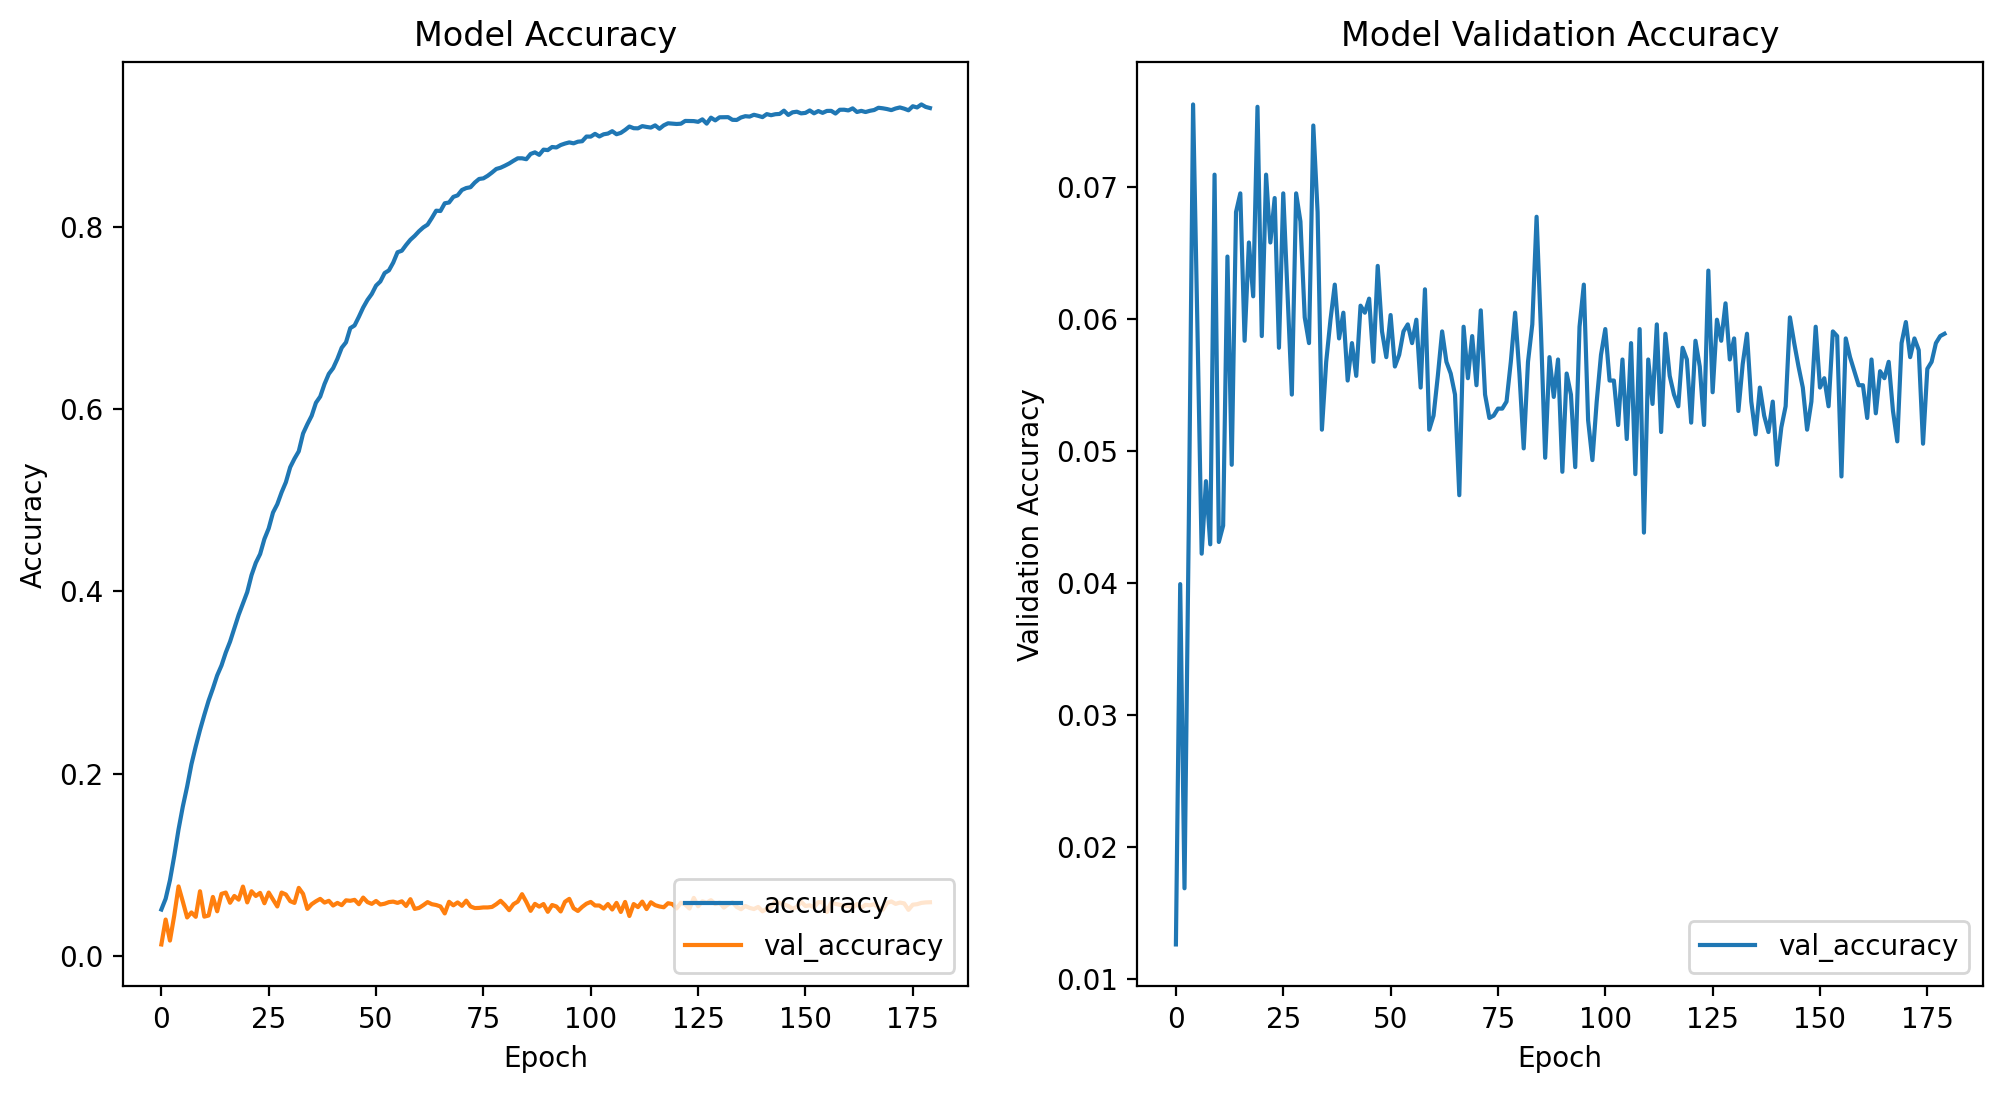

In [ ]:
#loaded_model = load_model('MODEL_2lstm_25neurons_25epochs_100batchsize_seq100.hdf5')

#try:
#    history = loaded_model.history
#except AttributeError:
#    print("Model nie posiada historii trenowania.")
#    history = None

if history is not None:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Wykres val_accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Model Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend(loc='lower right')

    plt.show()
else:
    print("Brak dostępnej historii trenowania.")


In [149]:
model = load_model("drive/MyDrive/Praca_inzynierska/mod/GRU_weights-18-1.3545-AI_65_seq_wej_.hdf5")
print("DONEE")

DONEE


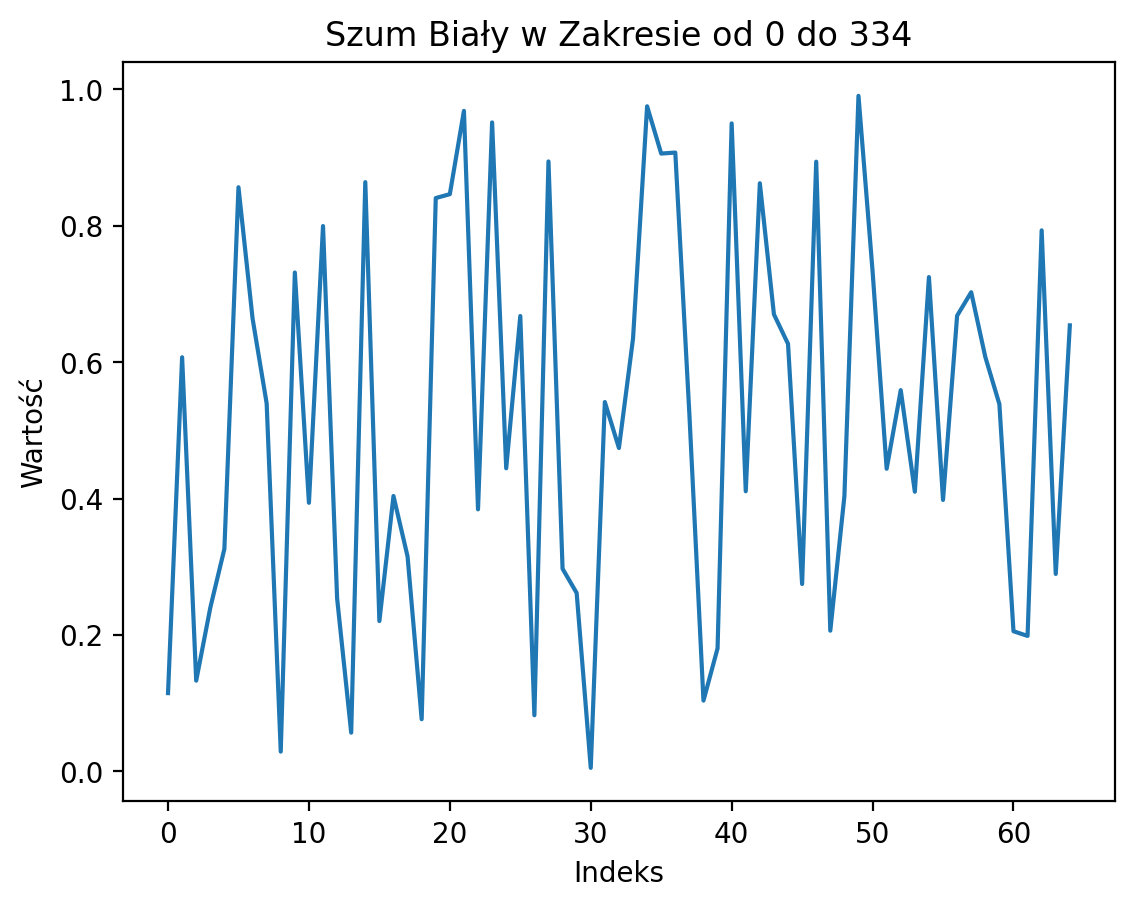

[0.11471009 0.60724299 0.13299159 0.23986929 0.3261596  0.85656522
 0.66409593 0.53954197 0.02892696 0.73155145 0.39376753 0.79964578
 0.25365939 0.05671462 0.86405388 0.22036723 0.4037769  0.31515007
 0.07643317 0.84070007 0.84639741 0.96855651 0.38422309 0.95163038
 0.44442375 0.66771949 0.08225304 0.89441266 0.29711127 0.26151948
 0.00511419 0.54157616 0.47417243 0.63446837 0.97527538 0.90594221
 0.90742807 0.52368305 0.10370752 0.18037293 0.95018681 0.41071959
 0.86242725 0.67016477 0.6269032  0.27473375 0.8940624  0.20627194
 0.40319445 0.99059772 0.73352431 0.44372889 0.55898454 0.41002419
 0.72481138 0.39800169 0.66813874 0.70260568 0.60773484 0.53841759
 0.20546484 0.19856518 0.79335641 0.28946352 0.65399887]


In [ ]:
np.random.seed(43)



white_noise = (np.random.uniform(0, (n_vocab - 1), seq))/n_vocab
plt.plot(white_noise)
plt.title('Szum Biały w Zakresie od 0 do {}'.format(n_vocab))
plt.xlabel('Indeks')
plt.ylabel('Wartość')
plt.show()
print(white_noise)

[0.54421714 0.85628518 0.68383902 0.33059903 0.0598183  0.38512126
 0.21251169 0.92971471 0.72065417 0.0467549  0.81885183 0.59009743
 0.2513168  0.31413335 0.18727563 0.34927105 0.25647262 0.01108084
 0.4083622  0.41102016 0.04305946 0.95214949 0.39648663 0.52807259
 0.23211587 0.30768099 0.55032521 0.70635444 0.95056999 0.60012264
 0.40104722 0.35386753 0.81172588 0.29675072 0.54298374 0.96019874
 0.18284639 0.72581771 0.73104474 0.04600183 0.96668344 0.36943413
 0.70482764 0.27311055 0.24829942 0.30405929 0.13843626 0.97219535
 0.00838672 0.89179374 0.35314369 0.92425978 0.3992886  0.46704864
 0.44610755 0.90570454 0.64037323 0.23908597 0.67431412 0.42789735
 0.22438685 0.15138094 0.45219394 0.81943711 0.63603781]


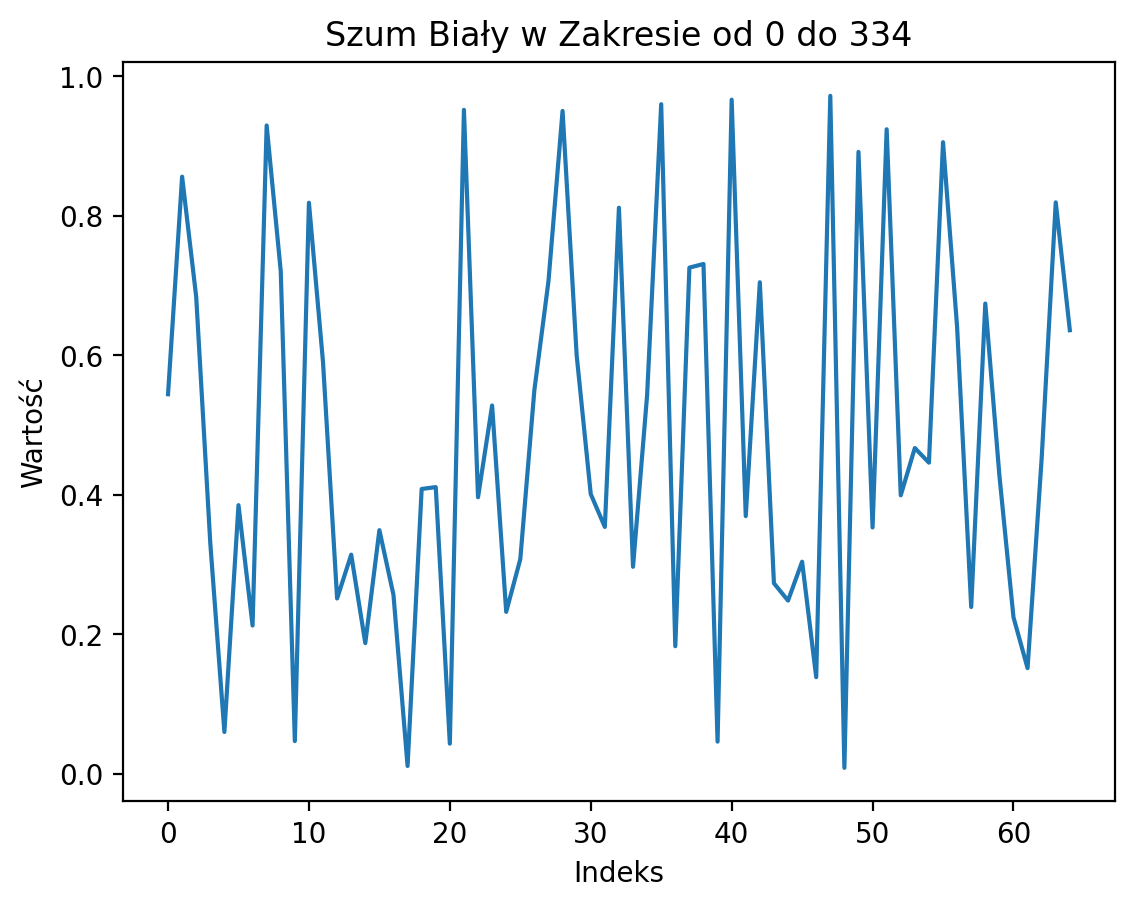

In [ ]:
np.random.seed(67)
pattern = (np.random.uniform(0, (n_vocab - 1), seq)) / n_vocab # SZUM BIALY

print(pattern)
plt.plot(pattern)
plt.title('Szum Biały w Zakresie od 0 do {}'.format(n_vocab))
plt.xlabel('Indeks')
plt.ylabel('Wartość')
plt.show()

In [233]:
# generowanie nowych nut
import random
np.random.seed(50)
number_of_notes = (58 * 6)
start = np.random.randint(0, len(network_input_test) - sequence_length - 1)
#start = 2
int_to_note = dict((number, note) for number, note in enumerate(pitchnames))
#pattern = network_input_test[start] # dane testowe
pattern = (np.random.uniform(0, (n_vocab - 1), seq)) / n_vocab # SZUM BIALY
#tr = network_input_test[start]
tr = pattern
train = []
prediction_output = []
for note_index in range(number_of_notes):
    prediction_input = np.reshape(pattern, (1, len(pattern), 1)) # normalizacja
  #  prediction_input = prediction_input / float(n_vocab)
    prediction = model.predict(prediction_input, verbose=0)
    index = np.argmax(prediction)
    # print(pattern)
    result = int_to_note[index]
    prediction_output.append(result)
    index = index / float(n_vocab)
    pattern = np.append(pattern, index)
    pattern = pattern[1:len(pattern)]
    if(note_index < seq ):
       k = (tr[note_index])
       j = n_vocab * k
       w = int_to_note[int(j)]
       train.append(w)
    #cos = int_to_note[tr[note_index]]
    #train = np.append(train, cos)

#print(train)
#print(len(train))
print(start)
print(len(pattern))
print("______________________")
print(train)
print(len(train))
print("______________________")
#print(pattern)
#print(len(pattern))
print("DONE")
print("______________________")
print(prediction_output)
print(len(prediction_output))
print("______________________")


1712
65
______________________
['1.5.9', '0.5', '6.7.10', '0.1.3.6', '10.0.3', 'F#3', '9.10.11.0.1.2.4.5.6', '11.1.4.6', '2.5.7.10', '4.10', '1.6', '6.10.1', 'G#1', '1.3', '2.3.6', '11.1.3.6.8', '4.8.10', '0.2.6', '11.2.6', '7.10.2', '9.1', '3.4.5.6.7.8.9', '1.4.6', '10.1.3.6', '0.1.3.4.8', '9.1', '11.4', 'B4', '5', '7.8.9.10.11', '0.3', '9.0.2', '10.2.3', '0.1.3.4.6', '2.4.9', '7.11', '11.4', '10.3', 'C#6', '8.10.3', 'E-5', 'G2', 'E2', '10.11.3', '10.0.4', 'C6', '4.5.7.11', '2.3.5.8', '11.0.1.2.3.7', '7.9.0', '4.8.11', '11.3.4', 'D4', 'F#3', 'G#3', '4.8.10', 'G#4', '2.7', 'B1', '3.6.9.11', '0.2.7', '0.1.4', '5', '2.6.7', '4.6.11']
65
______________________
DONE
______________________
['E-4', '0.4', '4.7', '0.4', 'C#4', '0.5', 'F4', '10.2.5', 'F4', '5.9.0', '2.5', 'F4', '0.5', 'F3', 'B-4', '0.5', 'F4', 'F4', '5.9.0', 'F4', 'F4', 'F4', '0.5', '5.9.0', 'F3', '4.7', 'F4', 'C2', 'F4', '0.4.7', 'F4', '2.7', 'F3', 'F4', 'E3', '2.7', 'D5', '2.7', 'A4', '2.7', 'G2', 'G2', 'G4', '2.7', 'E4', '2

In [223]:
print(prediction_output)

['6.10.1', 'F#5', '6.10.1', '6.10.1', '6.10.1', '1.6', '3.6', '1.6', 'C#4', 'B3', '6.10.1', 'F#3', '6.10', '6.10', 'F#3', '6.10', 'B2', 'F#3', 'F#3', 'B-4', 'F#4', 'F#3', '11.3.6', 'B3', '11.3.6', 'E-4', 'B3', 'E-4', 'F#3', 'F#3', 'F#3', 'B3', 'F#3', 'B3', 'F#3', 'B3', 'B3', 'F#3', 'F#3', 'B3', 'F#3', 'B3', 'B3', 'B3', 'B3', 'B3', 'E-4', 'B2', 'B3', 'F#3', 'F#3', 'B3', 'F#3', 'B3', 'B3', 'F#3', 'B3', 'B3', 'F#3', 'F#3', 'F#3', 'F#3', 'B3', 'F#3', 'E-4', 'B3', 'B3', 'B2', 'B3', 'B3', 'E3', 'D4', 'B3', 'F#3', 'F3', 'D4', 'A3', 'F4', 'D4', 'B3', 'D4', 'B3', 'D4', 'G4', 'D4', 'B3', 'A3', 'A4', 'G4', 'D4', 'G4', 'G4', 'E4', 'E4', 'E4', 'G4', 'A4', 'G4', 'E4', 'C4', 'C4', 'E4', 'E4', 'E4', 'E4', 'C5', 'E4', 'E4', 'C5', 'C5', 'C5', 'E4', 'E4', 'G4', 'G4', 'C5', 'C5', 'D5', 'A4', 'G4', 'C4', 'E4', 'E4', 'E4', 'E4', 'E4', 'C5', 'G4', 'E4', 'C5', 'C5', 'C5', 'E4', 'C5', 'A4', 'A4', 'A4', 'G4', 'E4', 'G4', 'G4', 'E4', 'C5', 'C5', 'A4', 'A4', 'C5', 'C5', 'E4', 'E4', 'E4', 'C5', 'C5', 'C5', 'C5', '

In [234]:
# tworzenie nut i akordów dla nowych danych
offset = 0  # przesuniecie nut lub akordów (czas)
output_notes = []

for item in prediction_output:
    # szukanie akordów
    if ('.' in item) or item.isdigit():
        notes_in_chord = item.split('.')
      #  print(notes_in_chord)
        notes12 = []
        for current_note in notes_in_chord:
            new_note = note.Note(int(current_note))
            new_note.storedInstrument = instrument.AcousticGuitar()
            notes12.append(new_note)
        new_chord = chord.Chord(notes12)
        new_chord.offset = offset
        output_notes.append(new_chord)
    # nuta
    else:
          #   print(item)
        new_note = note.Note(item)
        new_note.offset = offset
        new_note.storedInstrument = instrument.AcousticGuitar()
        output_notes.append(new_note)

    offset += 0.5
       # new_note = note.Note(item)
       # new_note.offset = offset
       # new_note.storedInstrument = instrument.AcousticGuitar()
       # output_notes.append(new_note)



print("DONE")
print(output_notes)

DONE
[<music21.note.Note E->, <music21.chord.Chord C E>, <music21.chord.Chord E G>, <music21.chord.Chord C E>, <music21.note.Note C#>, <music21.chord.Chord C F>, <music21.note.Note F>, <music21.chord.Chord B- D F>, <music21.note.Note F>, <music21.chord.Chord F A C>, <music21.chord.Chord D F>, <music21.note.Note F>, <music21.chord.Chord C F>, <music21.note.Note F>, <music21.note.Note B->, <music21.chord.Chord C F>, <music21.note.Note F>, <music21.note.Note F>, <music21.chord.Chord F A C>, <music21.note.Note F>, <music21.note.Note F>, <music21.note.Note F>, <music21.chord.Chord C F>, <music21.chord.Chord F A C>, <music21.note.Note F>, <music21.chord.Chord E G>, <music21.note.Note F>, <music21.note.Note C>, <music21.note.Note F>, <music21.chord.Chord C E G>, <music21.note.Note F>, <music21.chord.Chord D G>, <music21.note.Note F>, <music21.note.Note F>, <music21.note.Note E>, <music21.chord.Chord D G>, <music21.note.Note D>, <music21.chord.Chord D G>, <music21.note.Note A>, <music21.chord.

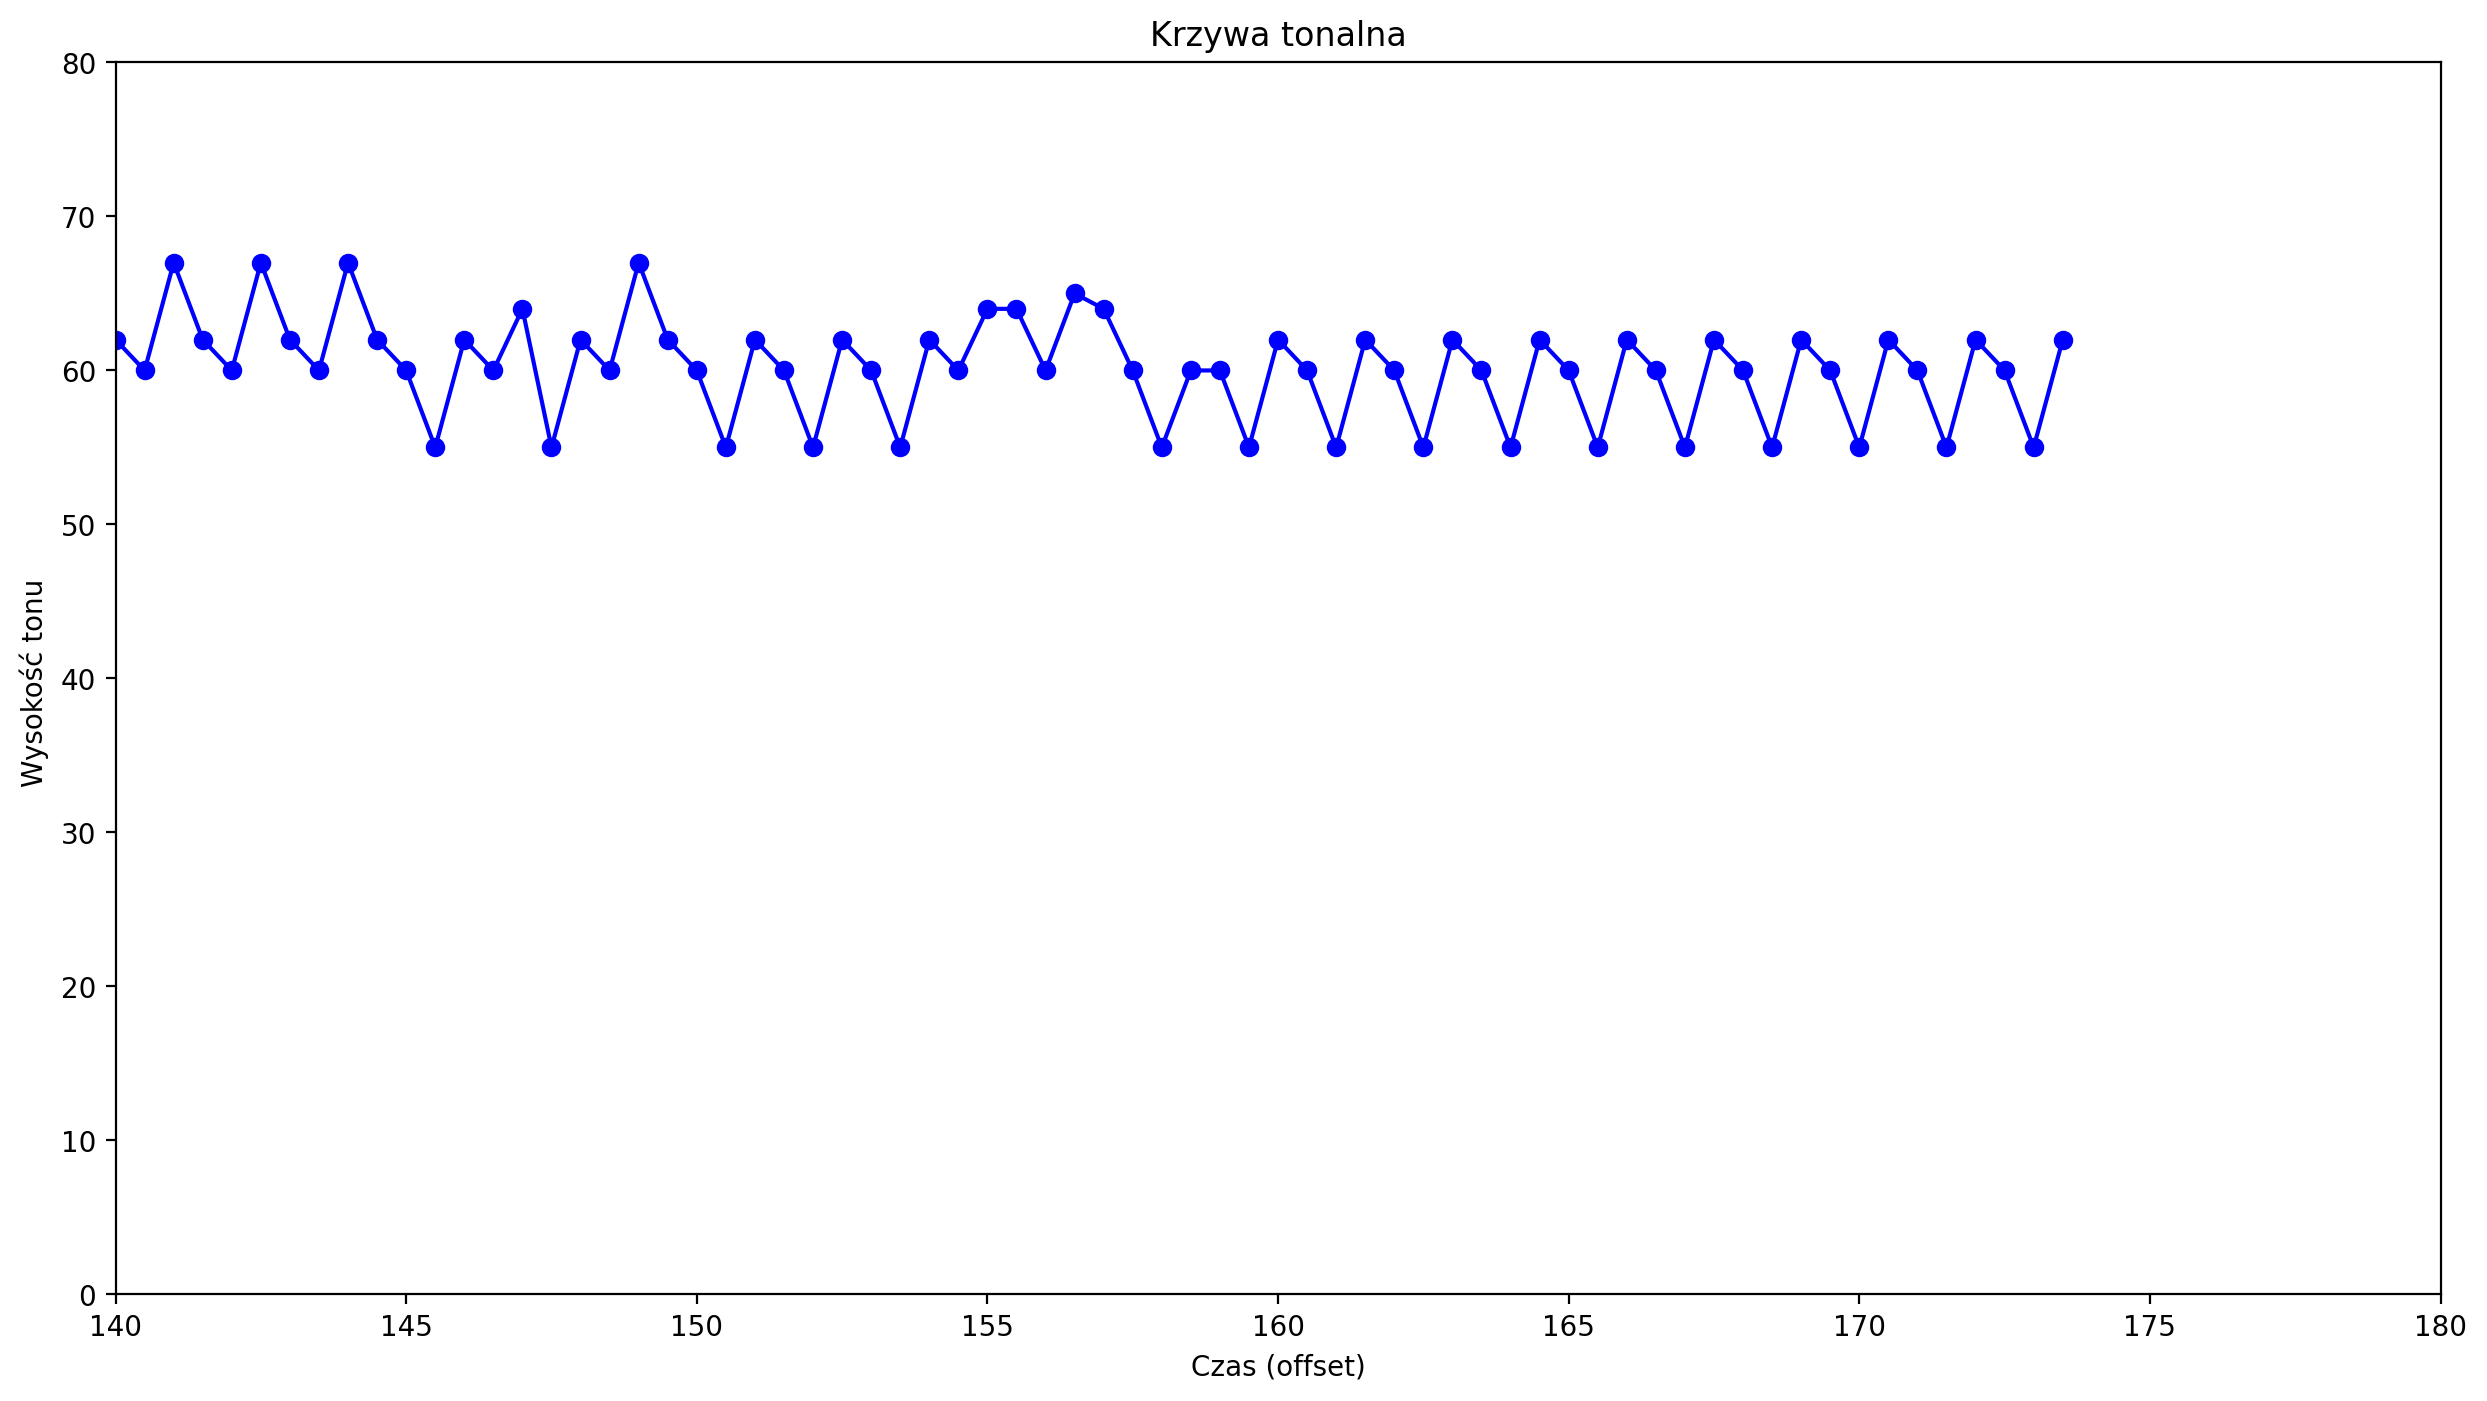

In [236]:
# nowe dane
offsets = []
pitches = []

for item in output_notes:
    if isinstance(item, note.Note):
        offsets.append(item.offset)
        pitches.append(item.pitch.midi)
    elif isinstance(item, chord.Chord):
        chord_pitches = [note_in_chord.pitch.midi for note_in_chord in item.notes]
        avg_pitch = sum(chord_pitches) / len(chord_pitches) # dla akordów liczona jest średnia arytmetyczna
        offsets.append(item.offset)
        pitches.append(avg_pitch)

plt.figure(figsize=(15, 8))
plt.plot(offsets, pitches, marker='o', linestyle='-', color='b')
plt.title('Krzywa tonalna')
plt.xlabel('Czas (offset)')
plt.ylabel('Wysokość tonu ')

# Ustaw zakres osi Y
plt.ylim(0, 80)
plt.xlim(140, 180)
plt.savefig('drive/MyDrive/Praca_inzynierska/czesc_szum_bialy_nowe_dane_wykres_tonalny_gru5.png')

DONE


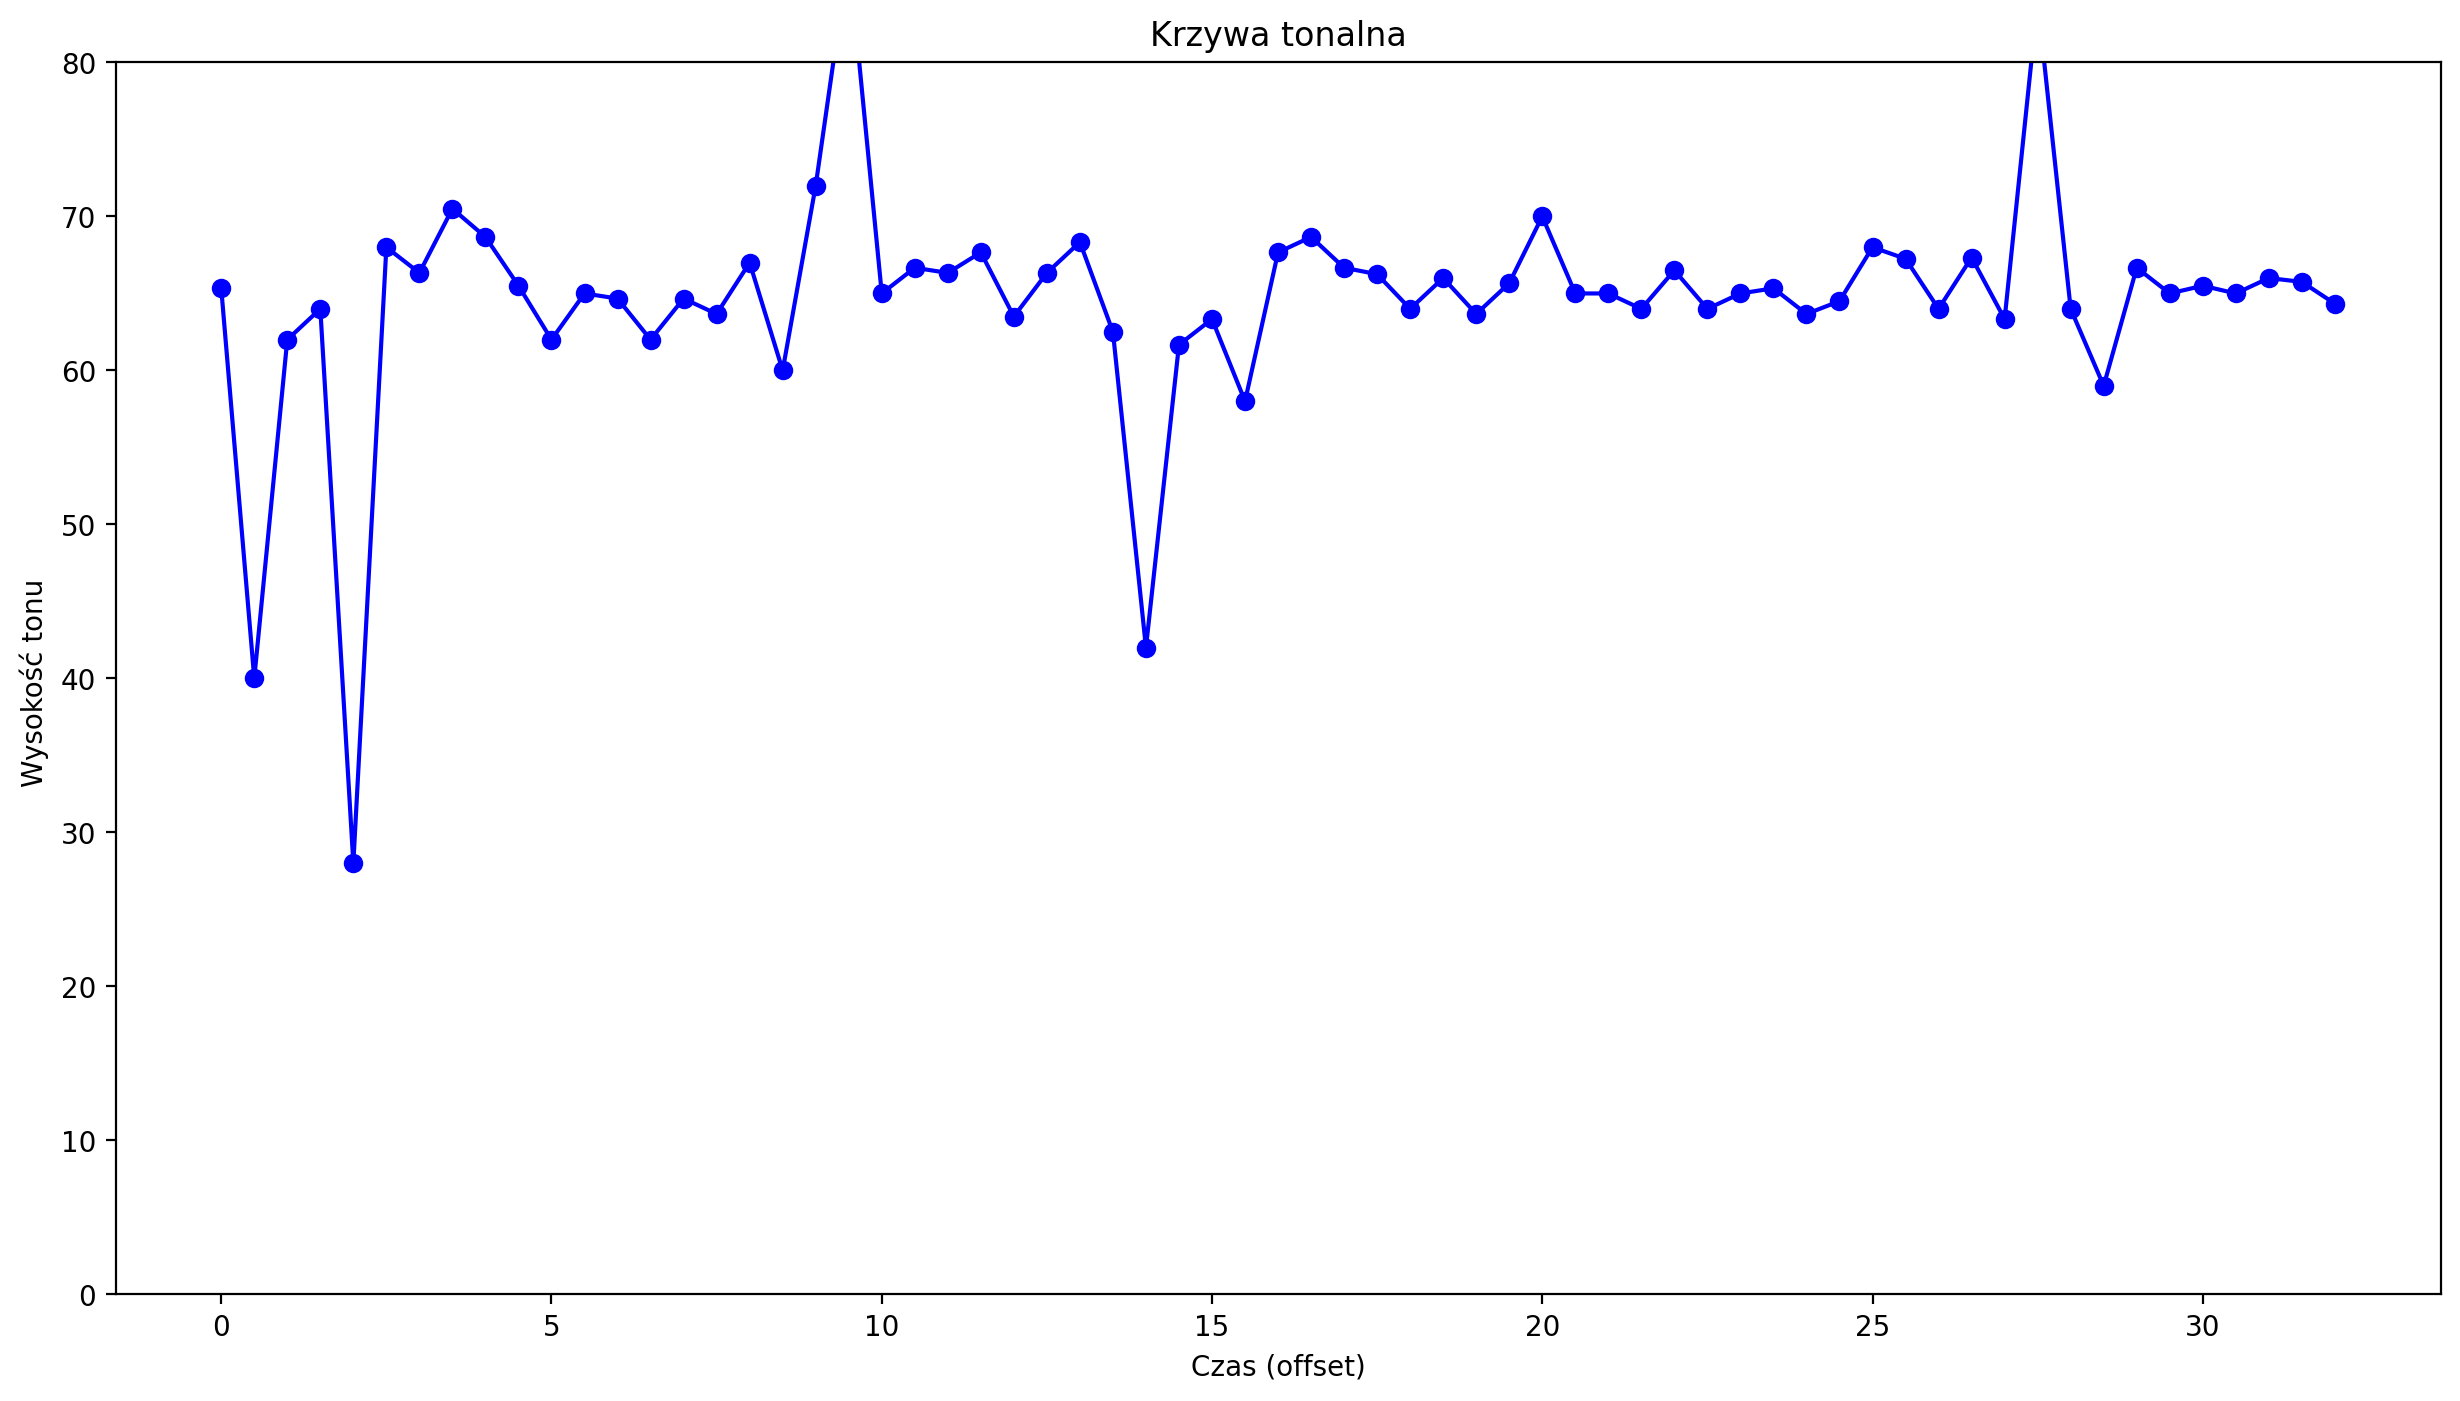

In [189]:
# DLA DANYCH TRENINGOWYCH

offset = 0  # przesuniecie nut lub akordów (czas)
output_notes1 = []

for item in train:
    # szukanie akordów
    if ('.' in item) or item.isdigit():
        notes_in_chord = item.split('.')
      #  print(notes_in_chord)
        notes12 = []
        for current_note in notes_in_chord:
            new_note = note.Note(int(current_note))
            new_note.storedInstrument = instrument.AcousticGuitar()
            notes12.append(new_note)
        new_chord = chord.Chord(notes12)
        new_chord.offset = offset
        output_notes1.append(new_chord)
    # nuta
    else:
          #   print(item)
        new_note = note.Note(item)
        new_note.offset = offset
        new_note.storedInstrument = instrument.AcousticGuitar()
        output_notes1.append(new_note)

    offset += 0.5


offsets1 = []
pitches1 = []

for item in output_notes1:
    if isinstance(item, note.Note):
        offsets1.append(item.offset)
        pitches1.append(item.pitch.midi)
    elif isinstance(item, chord.Chord):
        chord_pitches = [note_in_chord.pitch.midi for note_in_chord in item.notes]
        avg_pitch = sum(chord_pitches) / len(chord_pitches) # dla akordów liczona jest średnia arytmetyczna
        offsets1.append(item.offset)
        pitches1.append(avg_pitch)

plt.figure(figsize=(15, 8))
plt.plot(offsets1, pitches1, marker='o', linestyle='-', color='b')
plt.title('Krzywa tonalna')
plt.xlabel('Czas (offset)')
plt.ylabel('Wysokość tonu ')

# Ustaw zakres osi Y
plt.ylim(0, 80)

plt.savefig('drive/MyDrive/Praca_inzynierska/szum_bialy_trening_wykres_tonalny_gru3.png')

file_out = f'drive/MyDrive/Praca_inzynierska/szum_bialy_trening_wykres_tonalny_gru3.mid'

midi_stream = stream.Stream()

guitar = instrument.Guitar()
midi_stream.append(guitar)

for item in output_notes1:
    if isinstance(item, note.Note) or isinstance(item, chord.Chord):
        # Ustaw instrument dla każdej nuty i akordu
        item.storedInstrument = guitar
      #  item.offset = offset
        midi_stream.append(item)
        #offset += 0.5

#file_out = f'trening_MODEL{num_of_neurons}neurons_{epochs}epochs_{batch_size}batchsize_{seq}seq_len_{num_of_layers}_num_of_layers.mid'
midi_stream.write('midi', fp=file_out)
print("DONE")


In [237]:
# tworzenie pliku midi
#offset = 0
file_out = f'drive/MyDrive/Praca_inzynierska/szum_bialy_nowe_dane_wykres_tonalny_gru5.mid'

midi_stream = stream.Stream()

guitar = instrument.Guitar()
midi_stream.append(guitar)

for item in output_notes:
    if isinstance(item, note.Note) or isinstance(item, chord.Chord):
        # Ustaw instrument dla każdej nuty i akordu
        item.storedInstrument = guitar
      #  item.offset = offset
        midi_stream.append(item)
        #offset += 0.5

#file_out = f'MODEL{num_of_neurons}neurons_{epochs}epochs_{batch_size}batchsize_{seq}seq_len_{num_of_layers}_num_of_layers.mid'
midi_stream.write('midi', fp=file_out)
print("DONE")



DONE


In [ ]:
mf = converter.parse(file_out)
mf.show('midi')

In [ ]:
print(prediction_output)

['A4', 'C4', 'C4', 'E4', 'E4', 'G4', 'G4', '9.11.2', '9.11.2', '9.11.2', '9.11.2', '11.4', '11.4', 'D4', 'D4', 'C4', 'C4', 'E4', 'E4', 'E4', 'E4', 'G4', 'G4', 'G4', 'G4', 'A4', 'A4', 'C4', 'C4', 'E4', 'E4', 'G4', 'G4', '9.0.2.5', '9.0.2.5', '0.2.5.7', '0.2.5.7', '9.0.2.5', '9.0.2.5', '0.2.5.7', '0.2.5.7', '0.4.7', '0.4.7', '0.2.7', '0.2.7', '5.9.0', '5.9.0', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', '0.4.7', '0.4.7', '0.4.7', '0.4.7', '2.7']


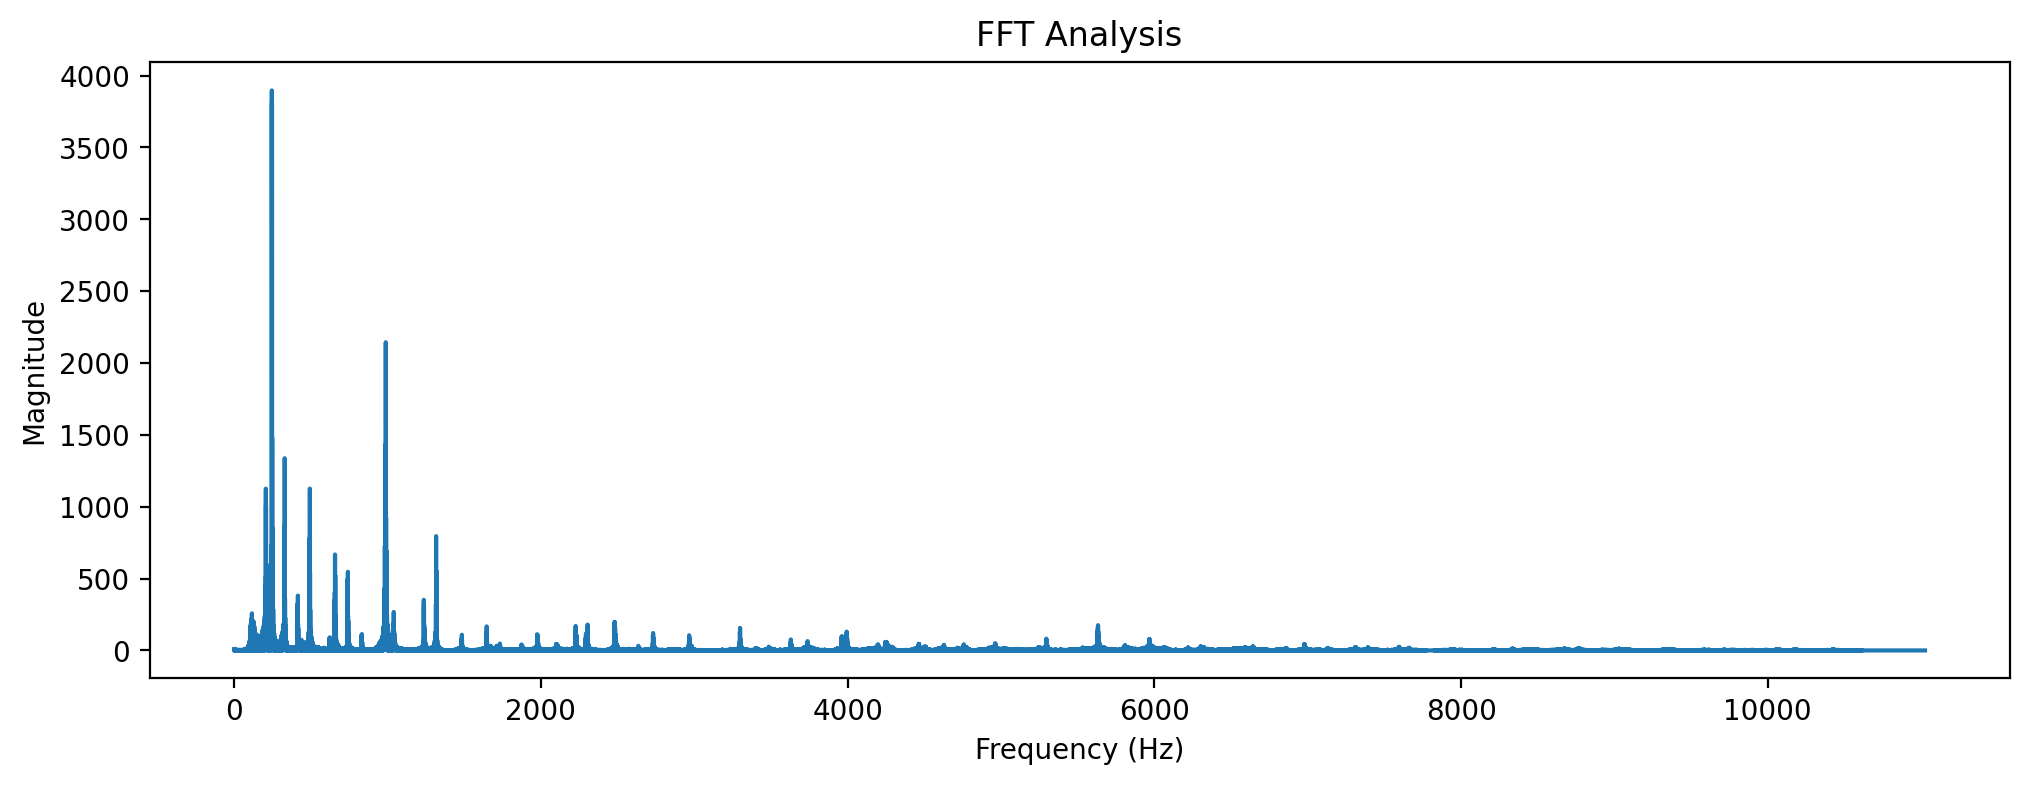

In [182]:
import librosa
import librosa.display

file_path = 'drive/MyDrive/Praca_inzynierska/wav/nowe_dane_gru3.wav'
output_image_path = 'drive/MyDrive/Praca_inzynierska/wav/nowe_dane_gru3_FFT.png'
y, sr = librosa.load(file_path)


fft_result = np.fft.fft(y)
magnitude = np.abs(fft_result)
frequency = np.fft.fftfreq(len(magnitude), 1/sr)


plt.figure(figsize=(12, 4))
plt.plot(frequency[:len(frequency)//2], magnitude[:len(magnitude)//2])
plt.title('FFT Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')


plt.savefig(output_image_path)
plt.show()

